In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0)
%matplotlib inline

def load_data_from_file(fileName = 'advertising.csv'):
    data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
    features_X = data[:, :3]
    sales_Y = data[:, 3]
    features_X = np.hstack((np.ones((features_X.shape[0], 1)), features_X))
    return features_X, sales_Y

In [2]:
features_X, _ = load_data_from_file()
print(features_X[:5, :])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [3]:
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [4]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):
    individual = [generate_random_value() for _ in range(n)]
    return individual

In [5]:
individual = create_individual()
print(individual)

[3.444218515250481, 2.5795440294030247, -0.79428419169155, -2.4108324970703663]


In [6]:
features_X, sales_Y = load_data_from_file()

def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 1 / (loss + 1)
    return fitness_value

In [7]:
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [8]:
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
    return individual1_new, individual2_new

In [9]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print(individual1, individual2)

[3.44, 2.57, -0.79, -2.41] [4.09, 4.82, 3.1, 4.02]


In [10]:
def mutate(individual, mutation_rate=0.05):
    individual_m = individual.copy()
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()
    return individual_m

In [11]:
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate=2.0)
print(before_individual == after_individual)

False


In [12]:
def initializePopulation(m):
    population = [create_individual() for _ in range(m)]
    return population

In [13]:
def selection(sorted_old_population, m=100):
    idx1 = random.randint(0, m-1)
    while True:
        idx2 = random.randint(0, m-1)
        if idx2 != idx1:
            break

    individual_s = sorted_old_population[idx1]
    if idx2 > idx1:
        individual_s = sorted_old_population[idx2]
    return individual_s

In [14]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print('Best loss:', compute_loss(sorted_population[m-1]), 'with chromsome: ', sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # selection
        individual_s1 = selection(sorted_population, m)
        individual_s2 = selection(sorted_population, m)

        # crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)

        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)

        # copy elitism chromosomes that have best fitness score to the next generation
        new_population.append(individual_m1)
        new_population.append(individual_m2)

    for ind in sorted_population[m-elitism:]:
        new_population.append(ind)
    return new_population, compute_loss(sorted_population[m-1])

In [15]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [16]:
def run_GA():
    n_generations = 100
    m = 600
    features_X, sales_Y = load_data_from_file()
    population = initializePopulation(m)
    losses_lst = []
    for i in range(n_generations):
        population, loss = create_new_population(population, elitism=2, gen=i)
        losses_lst.append(loss)
    return population, losses_lst

In [17]:
import matplotlib.pyplot as plt

def visualize_loss(losses_lst):
    plt.plot(losses_lst)
    plt.xlabel('Generations')
    plt.ylabel('losses')
    plt.show()

Best loss: 739.8294204863388 with chromsome:  [-3.5680060763415433, -0.16563985246176083, 1.0253028476359427, 0.19492010526637515]
Best loss: 444.684346439645 with chromsome:  [-1.4123643707137679, 0.020096063143656417, 1.2863010992570623, -0.12214696367519595]
Best loss: 444.684346439645 with chromsome:  [-1.4123643707137679, 0.020096063143656417, 1.2863010992570623, -0.12214696367519595]
Best loss: 258.7764394773352 with chromsome:  [-0.34191874199818395, 0.13579429273059218, 0.6826404106492379, -0.2916983572119891]
Best loss: 258.7764394773352 with chromsome:  [-0.34191874199818395, 0.13579429273059218, 0.6826404106492379, -0.2916983572119891]
Best loss: 29.4899486602462 with chromsome:  [4.4461595188531176, 0.07445900999234256, -0.16519298321049702, 0.017760523187029253]
Best loss: 29.4899486602462 with chromsome:  [4.4461595188531176, 0.07445900999234256, -0.16519298321049702, 0.017760523187029253]
Best loss: 29.4899486602462 with chromsome:  [4.4461595188531176, 0.074459009992342

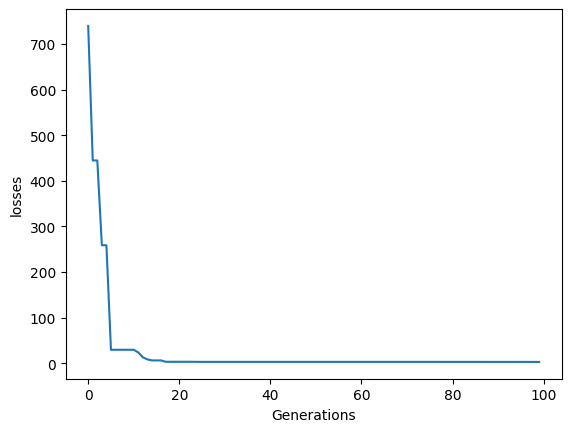

In [22]:
population, losses_lst = run_GA()
visualize_loss(losses_lst)

[4.720012828316337, 0.053120443920511295, 0.09080763321580809, 0.015202371002349668]


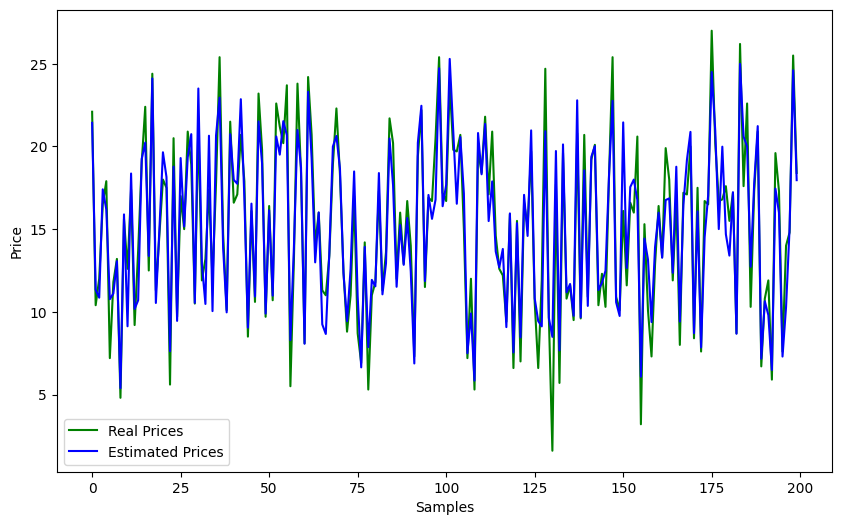

In [23]:
def visualize_predict_gt():
    # visualization of ground truth and predict value
    sorted_population = sorted(population, key=compute_fitness)
    print(sorted_population[-1])
    theta = np.array(sorted_population[-1])

    estimated_prices = []
    for feature in features_X:
        estimated_price = feature.dot(theta)
        estimated_prices.append(estimated_price)

    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.plot(sales_Y, c='green', label='Real Prices')
    plt.plot(estimated_prices, c='blue', label='Estimated Prices')
    plt.legend()
    plt.show()

visualize_predict_gt()